# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import torch
from unityagents import UnityEnvironment
import numpy as np
from multiAgent import MultiAgent
import matplotlib.pyplot as plt

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="../Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


You can select training mode for training by yourself by setting `state='Train'`. Otherwise you can just see the saved multi-agents by setting `state='Test'`. Here if you want to see agent's action slowly to see the result of 100 consecutive rewards, then set `mode='slow'`, else if fastly, `mode='fast'`

In [3]:
########################################## setting ##########################################
# state = 'Train'
state = 'Test'

mode = 'slow'
# mode = 'fast'
########################################## setting ##########################################

Episode 50	Average Score : 0.0060 	 eps : 0.988
Episode 100	Average Score : 0.0119 	 eps : 0.970
Episode 150	Average Score : 0.0244 	 eps : 0.948
Episode 200	Average Score : 0.0372 	 eps : 0.926
Episode 250	Average Score : 0.0589 	 eps : 0.900
Episode 300	Average Score : 0.0672 	 eps : 0.876
Episode 350	Average Score : 0.0835 	 eps : 0.839
Episode 400	Average Score : 0.1068 	 eps : 0.802
Episode 450	Average Score : 0.1217 	 eps : 0.743
Episode 500	Average Score : 0.1342 	 eps : 0.689
Episode 550	Average Score : 0.2174 	 eps : 0.579
Episode 600	Average Score : 0.4427 	 eps : 0.397
Episode 605	Average Score : 0.5147 	 eps : 0.348
Environment solved in 505 episodes!	Average Score: 0.5147000077366828962865952235006262


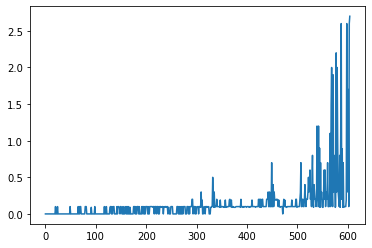

In [4]:
multi_agent = MultiAgent(env=env, state_size=8, action_size=2, random_seed=27)
if state == 'Train':
    scores = multi_agent.train(n_episodes=3000, max_t=3000)
    plt.plot(scores)
else: # Test     
    multi_agent.agents[0].actor_local.load_state_dict(torch.load('../saved_model/saved_agent_1_TD3_actor.pth'))
    multi_agent.agents[0].critic_local_1.load_state_dict(torch.load('../saved_model/saved_agent_1_TD3_critic_1.pth'))
    multi_agent.agents[0].critic_local_2.load_state_dict(torch.load('../saved_model/saved_agent_1_TD3_critic_2.pth'))
    multi_agent.agents[1].actor_local.load_state_dict(torch.load('../saved_model/saved_agent_2_TD3_actor.pth'))
    multi_agent.agents[1].critic_local_1.load_state_dict(torch.load('../saved_model/saved_agent_2_TD3_critic_1.pth'))
    multi_agent.agents[1].critic_local_2.load_state_dict(torch.load('../saved_model/saved_agent_2_TD3_critic_2.pth'))
    print('====================================')
    print('Sucessfully loaded')
    print('====================================')

    num_agents = 2
    score_test = []                                  
    for test_episode in range(1, 100+1):
        train_mode = True if mode == 'fast' else False
        env_info = multi_agent.env.reset(train_mode=train_mode)[multi_agent.brain_name]      # reset the environment
        state = env_info.vector_observations[:, -8:]                 # get the current state
        scores = np.zeros(num_agents)                                # initialize the score
        while True:
            action = multi_agent.act(state, add_noise=False)         # select an action
            env_info = env.step(action)[multi_agent.brain_name]      # send the action to the environment
            next_state = env_info.vector_observations[:, -8:]        # get the next state
            reward = env_info.rewards                                # get the reward
            done = env_info.local_done                               # see if episode has finished
            scores += reward                                         # update the score
            state = next_state                                       # roll over the state to next time step
            if any(done):                                            # exit loop if episode finished
                score_test.append(np.max(scores))
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(test_episode, np.mean(score_test)), end="")
                score_temp = 0.
                break
        
    print("\nFinal Score: {}".format(np.mean(score_test)))
    multi_agent.env.close()

When finished, you can close the environment.

In [5]:
env.close()